11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


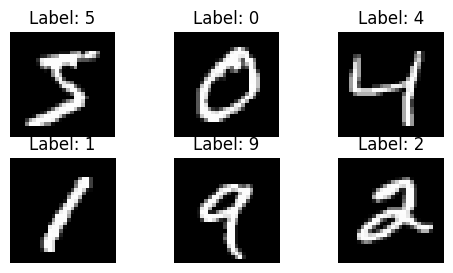

In [1]:
#Data Preparation
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Step 3: Normalize images (0-255 -> 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Step 4: Reshape for CNN (add channel dimension)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Step 5: One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Preview few samples
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()



In [2]:
#Baseline Modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build model
baseline_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_baseline = baseline_model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_test, y_test_cat))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8336 - loss: 0.6009 - val_accuracy: 0.9497 - val_loss: 0.1644
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9590 - loss: 0.1417 - val_accuracy: 0.9646 - val_loss: 0.1129
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9730 - loss: 0.0940 - val_accuracy: 0.9720 - val_loss: 0.0868
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9790 - loss: 0.0715 - val_accuracy: 0.9744 - val_loss: 0.0807
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9854 - loss: 0.0525 - val_accuracy: 0.9752 - val_loss: 0.0737


In [3]:
#Handle Class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
X_train_flat = X_train.reshape(-1, 28*28)   # Flatten for SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train)

print("Before SMOTE:", X_train.shape, "Class counts:", np.bincount(y_train))
print("After SMOTE:", X_train_res.shape, "Class counts:", np.bincount(y_train_res))


Before SMOTE: (60000, 28, 28) Class counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
After SMOTE: (67420, 784) Class counts: [6742 6742 6742 6742 6742 6742 6742 6742 6742 6742]


In [4]:
#cnn architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_data=(X_test_cnn, y_test_cat))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 101ms/step - accuracy: 0.8285 - loss: 0.5468 - val_accuracy: 0.9826 - val_loss: 0.0553
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9771 - loss: 0.0760 - val_accuracy: 0.9877 - val_loss: 0.0386
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9899 - val_loss: 0.0320
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.9871 - loss: 0.0412 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9906 - val_loss: 0.0286


Baseline Dense NN Accuracy: 0.9752
CNN Model Accuracy: 0.9906
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


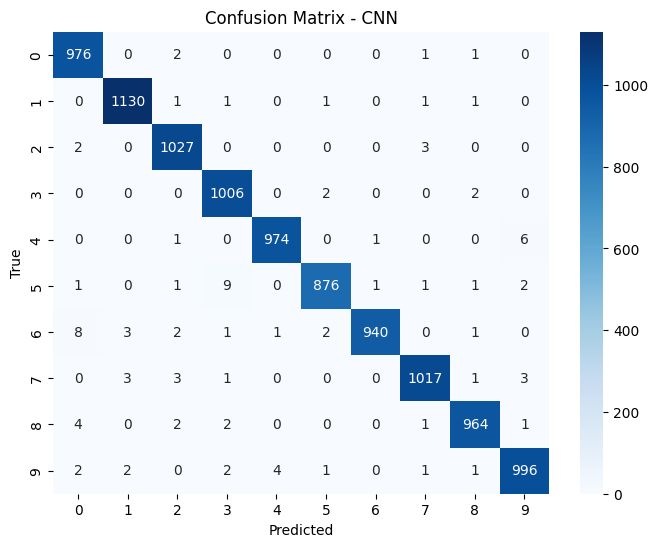

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



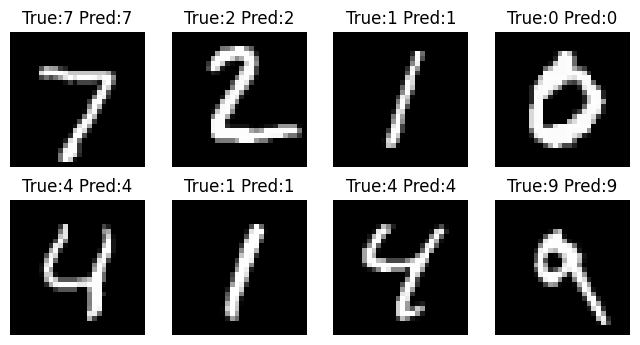

In [5]:
#Evaluation and comparison
# Evaluate models
baseline_acc = baseline_model.evaluate(X_test, y_test_cat, verbose=0)[1]
cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]

print(f"Baseline Dense NN Accuracy: {baseline_acc:.4f}")
print(f"CNN Model Accuracy: {cnn_acc:.4f}")

# Confusion Matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))

# Show some predictions
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True:{y_test[i]} Pred:{y_pred_classes[i]}")
    plt.axis("off")
plt.show()
